In [1]:
import sys
import networkx as nx
import numpy as np
import random
from collections import defaultdict
import torch
import math
import importlib


sys.path.insert(0, '../../')
import python_lib.graph_gen as graph_gen
import python_lib.models as models
from python_lib import solvers



In [2]:
%matplotlib inline

# Spin glass SK

### inter_H -> 0

### j_start -> random gaussian grad_variables

We generate a fully connected graph:

In [3]:
N = 20


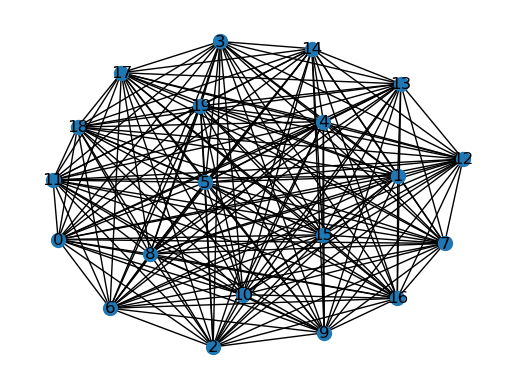

In [4]:
import importlib
import matplotlib.pyplot as plt

fig, ax0 = plt.subplots(1,1)
J_interaction = torch.ones(N,N) - torch.eye(N, N)

inter_H = 0
H = inter_H * (torch.ones(N))

if N < 200:
    graph_gen.plot_matrix_graph(J_interaction, ax0)

J_sigma_val = 1
J_0_val = 0
J_prob = graph_gen.spin_glass(N, J = J_sigma_val, J_0 = J_0_val)
J = graph_gen.set_J(J_interaction, J_prob)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

# Exact solutions
enumerating all configurations.

In [5]:
from python_lib.models import spins_model
importlib.reload(models)
device="cpu"
device="mps"
spin_glass = spins_model.model(N, H, J, J_interaction, device=device)
beta_fin=10
step = 0.1
betas = np.arange(step, beta_fin, 0.05)

In [6]:
spin_glass_exact = spins_model.model(N, H, J, J_interaction, device="cpu")
f_exact = []
for beta_ in betas:
    f_exact.append(spin_glass_exact.exact(beta_))


beta: 0.1, Fe: -6.957 Energy: -0.0513 M: -2.15e-09 S: 0.644   
beta: 0.2, Fe: -4.659 Energy: -0.0759 M: -6.77e-09 S: 0.623   
beta: 0.2, Fe: -3.517 Energy: -0.1 M: -6.81e-10 S: 0.603      
beta: 0.3, Fe: -2.836 Energy: -0.123 M: -2.27e-08 S: 0.585    
beta: 0.3, Fe: -2.386 Energy: -0.146 M: 7.18e-09 S: 0.569     
beta: 0.4, Fe: -2.067 Energy: -0.169 M: 1.13e-08 S: 0.555     
beta: 0.4, Fe: -1.831 Energy: -0.191 M: -2.15e-10 S: 0.541    
beta: 0.5, Fe: -1.650 Energy: -0.213 M: -2.47e-09 S: 0.53     
beta: 0.5, Fe: -1.508 Energy: -0.234 M: -6.7e-09 S: 0.519     
beta: 0.6, Fe: -1.393 Energy: -0.256 M: 4.44e-09 S: 0.51      
beta: 0.6, Fe: -1.299 Energy: -0.277 M: -3.43e-08 S: 0.503    
beta: 0.7, Fe: -1.221 Energy: -0.298 M: 4.38e-08 S: 0.496     
beta: 0.7, Fe: -1.156 Energy: -0.318 M: -7.25e-09 S: 0.491    
beta: 0.8, Fe: -1.101 Energy: -0.339 M: -2.56e-08 S: 0.487    
beta: 0.8, Fe: -1.054 Energy: -0.358 M: 2.06e-08 S: 0.485     
beta: 0.9, Fe: -1.013 Energy: -0.378 M: -8.44e-09 S: 0.

# Theoretical Values
at zero temperature
K0 S=-0.16 U=-0.798 
K1 S=-0.01 U=-0.7653 
K2 S=-0.004 U=-0.7636 

# Neural network solutions
## ordered case

In [7]:
from python_lib.nets import simple_layer
from python_lib.solvers import train_nn_anneal
importlib.reload(simple_layer)
importlib.reload(solvers)
bias = True
net = simple_layer.simple_layer(spin_glass.N, spin_glass, bias, device=device)

mps:0
mps:0
mps:0
Total number of trainable parameters: 420


In [8]:
from python_lib.nets import simplest
from python_lib.solvers import train_nn_anneal
importlib.reload(simplest)
importlib.reload(solvers)
bias = True
net_simplest = simplest.simplest(spin_glass.N, spin_glass, bias, device=device)

In [9]:
sample = torch.zeros([batch_size, net_simplest.N], device=net_simplest.device, dtype=net_simplest.dtype)

NameError: name 'batch_size' is not defined

In [157]:
#torch.nn.sigmoid(net_simplest.layer1(2*sample))

In [10]:
from python_lib.solvers import train_nn_anneal
importlib.reload(simple_layer)
importlib.reload(solvers)
import pandas as pd

lr = 0.001
max_step=100
batch_size=2000
stats = train_nn_anneal(
    net_simplest, 
    betas,
    lr=lr, 
    max_step=max_step,
    batch_size=batch_size)
stats_pd = pd.DataFrame(stats)

/Users/ocadni/opt/anaconda3/envs/m1torch/lib/python3.10/site-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


 1.65 fe: -0.511 +- 0.03024 E: -0.161, S: 0.577, M: 0.02175

KeyboardInterrupt: 

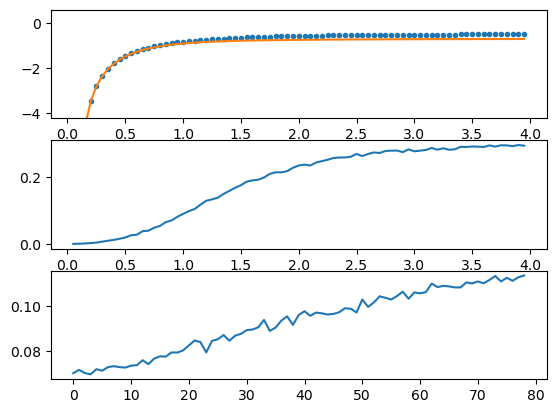

In [163]:
stats_pd_est = pd.DataFrame(stats)
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(3,1)
ax0.plot(betas, stats_pd_est["free_energy_mean"], ".")
ax0.plot(betas, f_exact)
ax0.set_ylim(-4.25,0.6)

ax1.plot(betas, np.abs(f_exact-stats_pd_est["free_energy_mean"])/np.abs(f_exact))
    
ax2.plot(stats_pd_est["free_energy_std"])

In [128]:
from python_lib.solvers import train_nn_anneal
importlib.reload(simple_layer)
importlib.reload(solvers)
import pandas as pd

lr = 0.001
max_step=100
batch_size=2000
stats = train_nn_anneal(
    net, 
    np.full(100, 0.0001),
    lr=lr, 
    max_step=5,
    batch_size=batch_size)
stats = train_nn_anneal(
    net, 
    betas,
    lr=lr, 
    max_step=max_step,
    batch_size=batch_size)
stats_pd = pd.DataFrame(stats)

 0.00 fe: -6931.478 +- 1.66951 E: -0.004, S: 0.693, M: 0.020752

KeyboardInterrupt: 

In [ ]:
stats_pd = pd.DataFrame(stats)

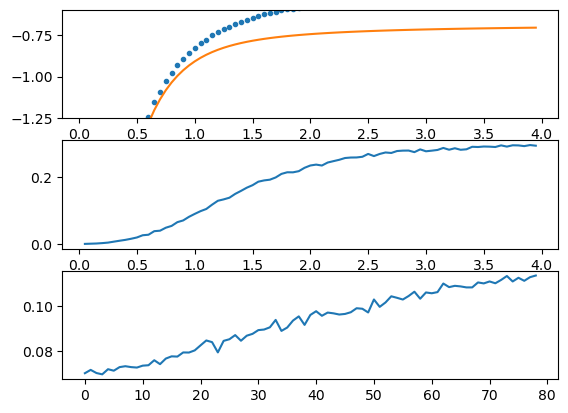

In [162]:
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(3,1)
ax0.plot(betas, stats_pd["free_energy_mean"], ".")
ax0.plot(betas, f_exact)
ax0.set_ylim(-1.25,-0.6)

ax1.plot(betas, np.abs(f_exact-stats_pd["free_energy_mean"])/np.abs(f_exact))
    
ax2.plot(stats_pd["free_energy_std"])

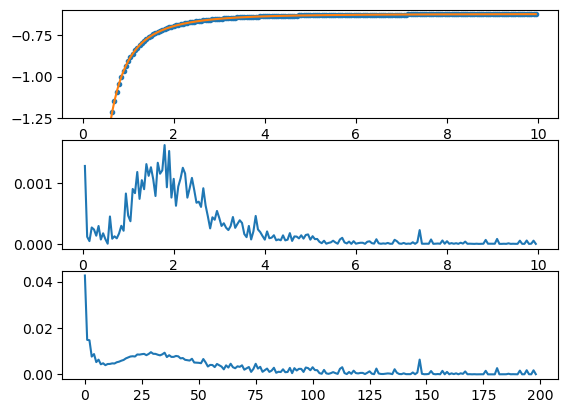

In [ ]:
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(3,1)
ax0.plot(betas, stats_pd["free_energy_mean"], ".")
ax0.plot(betas, f_exact)
ax0.set_ylim(-1.25,-0.6)

ax1.plot(betas, np.abs(f_exact-stats_pd["free_energy_mean"]))
    
ax2.plot(stats_pd["free_energy_std"])

In [ ]:
stats_pd.keys()

Index(['free_energy_mean', 'free_energy_std', 'entropy_mean', 'energy_mean',
       'mag', 'mag_mean'],
      dtype='object')

In [ ]:
stats_pd[stats_pd["beta"]==0.2]

KeyError: 'beta'

(-1.25, -0.7)

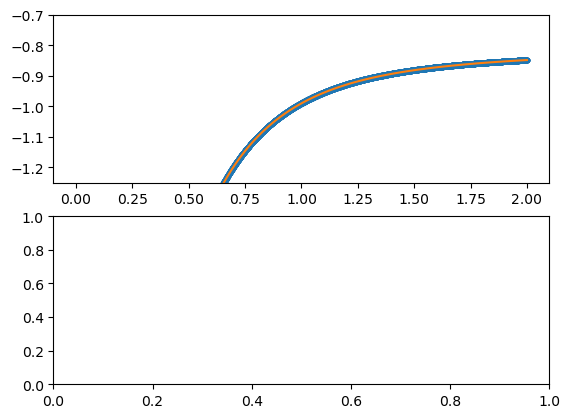

In [ ]:
import matplotlib.pyplot as plt
fig, (ax0, ax1) = plt.subplots(2,1)
ax0.plot(betas, stats_pd["free_energy_mean"], ".")
ax0.plot(np.linspace(0.001,beta,100), f_exact)
ax0.set_ylim(-1.25,-0.7)

for b in np.linspace(0.001,beta,100):
    
err = [np.abs()]

In [ ]:
net.compute_stats(beta, batch_size=50000)

 10.00 fe: -0.739 +- 0.00870 E: -0.736, S: 0.027, M: 0.859

{'free_energy_mean': -0.7392186279296875,
 'free_energy_std': 0.008703468322753906,
 'entropy_mean': 0.027395074367523194,
 'energy_mean': -0.7364790344238281,
 'mag': array([ 0.85432   ,  0.85863996,  0.87307996,  0.35123998,  0.87483996,
         0.852     , -0.87583995,  0.87571996, -0.87588   , -0.87583995,
         0.87512   ,  0.87592   ,  0.8756    , -0.87579995, -0.87564   ,
        -0.87592   , -0.87567997, -0.87579995, -0.87579995,  0.87188   ,
         0.87588   , -0.87567997, -0.87583995,  0.87552   ,  0.876     ,
         0.87571996,  0.87324   ,  0.8752    ,  0.8678    ,  0.87531996,
         0.87404   , -0.87516   , -0.87592   ,  0.87376   , -0.87579995,
        -0.87531996,  0.87435997, -0.87347996, -0.87564   ,  0.87571996,
        -0.87575996, -0.87535995, -0.8756    , -0.87596   ,  0.87527996,
        -0.87583995, -0.87236   ,  0.87535995, -0.87548   , -0.81747997,
         0.8754    ,  0.87579995, -0.87531996,  0.77948   , -0.8756    ,
         0.87544   , -0.87504 

## random case

In [ ]:
from python_lib.nets import bp_nn
importlib.reload(bp_nn)

net_rand = bp_nn.bp_nn(tree_rand.N, tree_rand, True, z2=False, init_zero=False,)
                      
net_rand.train(beta=beta, lr=0.001, 
           max_step=1000,
               opt="adam")


 0.50 1000 fe: -1.902 +- 0.23193 E: -0.867, S: 0.518, M: 0.43, B1 = -0.282

{'free_energy_mean': tensor(-1.9021, dtype=torch.float64),
 'free_energy_std': tensor(0.2319, dtype=torch.float64),
 'entropy_mean': tensor(0.5177, dtype=torch.float64, grad_fn=<DivBackward0>),
 'energy_mean': tensor(-0.8667),
 'mag': tensor([-0.1280,  0.4300, -0.6520,  0.5400,  0.3780, -0.6060,  0.5060,  0.4020,
         -0.4160,  0.3300,  0.3100, -0.4540, -0.6080, -0.3740, -0.3180]),
 'mag_mean': tensor(0.4301)}

In [ ]:
net_rand.compute_stat_is(beta, batch_size=10000)


free_energy: -2.189,  std_fe: 0.00191, mag_mean: 0.082, entropy: 0.392 energy: -1.405

tensor(-2.1889, dtype=torch.float64)

# BP solution

In [ ]:
import bp_solver
importlib.reload(bp_solver)

bp_sol = bp_solver.BP_solver(tree_rand)

In [ ]:
beta

0.5

In [ ]:
bp_sol.converge(beta)

fe: -1.611, ener: -0.431, M: 0.000, iter 6
